In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

In [30]:
def initialisation(dimensions):

    C = len(dimensions) 
    
    parametres = {}
    for c in range(1, C):
        parametres['W' +str(c)] = np.random.randn(dimensions[c], dimensions[c-1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)
        
    return parametres

In [31]:
# test de l'initialisation
param = initialisation([2, 32, 32,1])

for key, val in param.items():
    print(key, val.shape)


W1 (32, 2)
b1 (32, 1)
W2 (32, 32)
b2 (32, 1)
W3 (1, 32)
b3 (1, 1)


In [32]:
def forward_propagation(X, parametres):

    C = len(parametres) // 2 #comme W et b présent, alors on divise par 2
    activations = {'A0' : X}
    
    for c in range(1, C +1): 
        Z = parametres['W'+str(c)].dot(activations['A' +str(c-1)]) + parametres['b'+str(c)]
        activations['A' +str(c)] =   1 / (1 +np.exp(-Z))

        
    return activations

In [33]:
#test de la forward propoagation
params = initialisation([2, 32, 32,1])
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))
activations = forward_propagation(X, param)
for key, val in activations.items():
    print(key, val.shape)


A0 (2, 1000)
A1 (32, 1000)
A2 (32, 1000)
A3 (1, 1000)


In [21]:
def back_propagation(y, parametres, activations):

    
    m = y.shape[1]
    C = len(parametres) // 2 
    
    dZ = activations['A' + str(C)] - y
    gradients = {}

    
    
    
    
    for c in reversed(range(1, C+1)):
        gradients['dW'+ str(c)] = 1/m * np.dot(dZ, activations['A' + str(c -1)].T)
        gradients['db'+ str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        if c > 1:
            dZ = np.dot(parametres['W'+ str(c)].T, dZ) * activations['A' + str(c -1)] * (1 - activations['A' + str(c -1)])

    
    return gradients

In [34]:
grad = back_propagation(y, params, activations)

for key, val in grad.items():
    print(key, val.shape)


dW3 (1, 32)
db3 (1, 1)
dW2 (32, 32)
db2 (32, 1)
dW1 (32, 2)
db1 (32, 1)


In [24]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)]  - learning_rate * gradients['dW' + str(c)] 
        parametres['b' + str(c)] = parametres['b' + str(c)]  - learning_rate * gradients['db' + str(c)] 
        

    return parametres

In [43]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  C = len(parametres) // 2
  Af = activations['A' + str(C)]
  return Af >= 0.5

In [47]:
def  neural_network(X, y, hidden_layers = [32,32,32], learning_rate = 0.1, n_iter = 100):


    np.random.seed(0)
     # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    parametres = initialisation(dimensions)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        gradients = back_propagation(y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        
        if i %10 == 0: 
            C = len(parametres) // 2
            train_loss.append(log_loss(y, activations['A' + str(C)]))
            y_pred = predict(X, parametres)
            current_accuracy = accuracy_score(y.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,4)) 
    ax[0].plot(train_loss, label= 'train loss')
    ax[0].legend()

    ax[1].plot(train_acc, label='train acc')
    ax[1].legend()
    plt.show()

    return parametres

# Dataset
fictif

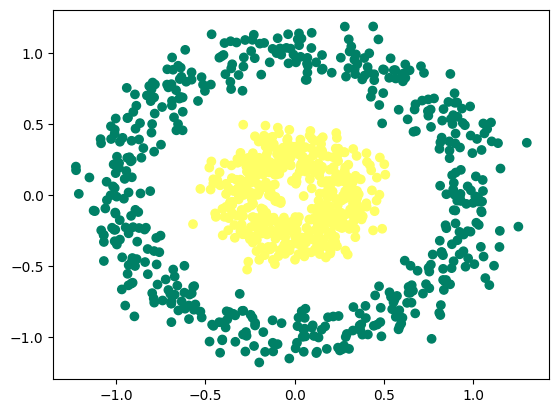

In [37]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))


plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\yassi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
C:\Users\yassi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
C:\Users\yassi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
 25%|██▌       | 25/100 [00:00<00:00, 246.60it/s]C:\Users\yassi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.

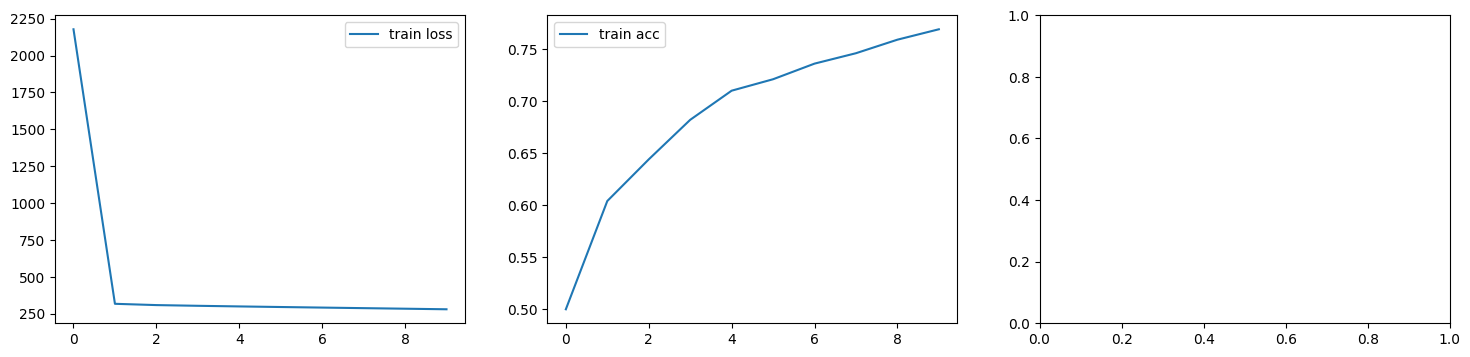

{'W1': array([[ 1.75950946,  0.43177972],
        [ 0.99518727,  2.1865042 ],
        [ 1.91761248, -1.0396671 ],
        [ 0.90735591, -0.14786526],
        [-0.10513988,  0.50643941],
        [ 0.14267348,  1.44727142],
        [ 0.80702354,  0.07485889],
        [ 0.36985097,  0.32714281],
        [ 1.56338942, -0.19463664],
        [ 0.3135732 , -0.91847083],
        [-2.58401049,  0.61237818],
        [ 0.89949893, -0.77499373],
        [ 2.29836417, -1.44646383],
        [ 0.0271339 , -0.10835707],
        [ 1.54265777,  1.50302774],
        [ 0.22571246,  0.4330345 ],
        [-0.91286514, -1.9897517 ],
        [-0.3554292 ,  0.19205483],
        [ 1.30416366,  1.17571874],
        [-0.37185835, -0.30070765],
        [-1.02466895, -1.36114735],
        [-1.67984531,  1.96947081],
        [-0.46749479, -0.35254452],
        [-1.28640885,  0.76319648],
        [-1.52835419, -0.24328622],
        [-0.91338486,  0.29372291],
        [-0.49487904, -1.25906056],
        [-0.05390325, 

In [48]:
neural_network(X, y, n_iter=100)